In [71]:
from keras.datasets import cifar10

In [72]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [73]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

In [74]:
img_cols

32

In [75]:
x_test.shape

(10000, 32, 32, 3)

In [76]:
x_train.shape[1] * x_train.shape[2]

1024

In [77]:
input_shape = (img_rows, img_cols, 3)

In [78]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [79]:
# Normalizing 0-255 to 0-1

x_train /= 255
x_test /= 255

In [80]:
y_test.shape

(10000, 1)

In [81]:
from keras.utils.np_utils import to_categorical

In [82]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [83]:
y_test.shape

(10000, 10)

In [84]:
num_classes = y_train.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [85]:
num_pixels

1024

In [93]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.optimizers import RMSprop

In [94]:
model = Sequential()

In [95]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding = 'same', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay = 1e-6)

In [96]:
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [98]:
batch_size = 32
epoch = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose = 1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 212us/step - loss: 1.8114 - acc: 0.3336 - val_loss: 1.5798 - val_acc: 0.4274
Epoch 2/20
50000/50000 [==============================] - 10s 203us/step - loss: 1.5026 - acc: 0.4554 - val_loss: 1.3779 - val_acc: 0.5084
Epoch 3/20
50000/50000 [==============================] - 10s 199us/step - loss: 1.3653 - acc: 0.5120 - val_loss: 1.2552 - val_acc: 0.5594
Epoch 4/20
50000/50000 [==============================] - 10s 202us/step - loss: 1.2678 - acc: 0.5487 - val_loss: 1.2825 - val_acc: 0.5449
Epoch 5/20
50000/50000 [==============================] - 10s 202us/step - loss: 1.1929 - acc: 0.5764 - val_loss: 1.1317 - val_acc: 0.5913
Epoch 6/20
50000/50000 [==============================] - 10s 206us/step - loss: 1.1281 - acc: 0.6005 - val_loss: 1.0551 - val_acc: 0.6299
Epoch 7/20
50000/50000 [==============================] - 10s 205us/step - loss: 1.0780 - acc: 0.6201 - val_loss: 1.

In [99]:
score = model.evaluate(x_test, y_test, verbose = 1)

10000/10000 [==============================] - 1s 69us/step


In [100]:
print('Test loss', score[0])

Test loss 0.7560916256904602


In [101]:
print('Test accuraacy', score[1])

Test accuraacy 0.7454


In [102]:
history.history

{'val_loss': [1.5797738832473756,
  1.377902237510681,
  1.2552280323028564,
  1.2824865518569946,
  1.13173223361969,
  1.0550809694290162,
  1.0268298341751099,
  0.9712234775543213,
  0.9669132772445679,
  0.9237809178352356,
  0.88084448928833,
  0.8462002326011657,
  0.8928840242385864,
  0.800114826965332,
  0.8309072109222412,
  0.8040560801506043,
  0.7966946927070617,
  0.7710911665916443,
  0.7483150938987732,
  0.7560916256904602],
 'val_acc': [0.4274,
  0.5084,
  0.5594,
  0.5449,
  0.5913,
  0.6299,
  0.6385,
  0.6674,
  0.6658,
  0.673,
  0.6974,
  0.7088,
  0.6878,
  0.7254,
  0.7157,
  0.7214,
  0.7275,
  0.7334,
  0.7478,
  0.7454],
 'loss': [1.8113524129486085,
  1.5026198220825195,
  1.3653495861816407,
  1.2677835589599609,
  1.192943278465271,
  1.1280763850021363,
  1.077958074951172,
  1.0274528080558776,
  0.9891383922958374,
  0.947584522228241,
  0.9173561939239502,
  0.8943570492935181,
  0.8636781918716431,
  0.8427108040237427,
  0.8267077066612244,
  0.805

In [103]:
import matplotlib.pyplot as plt

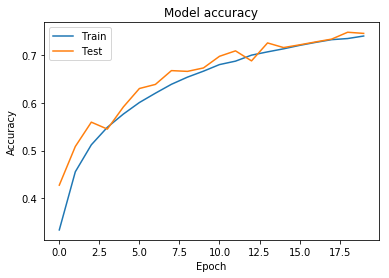

In [104]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

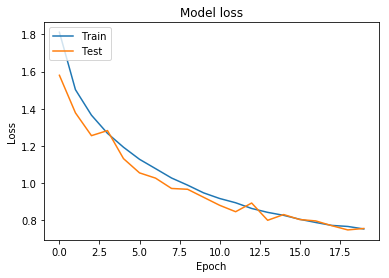

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [106]:
model.save('Cifar-10.h5')
print('Model Saved')

Model Saved


In [107]:
from keras.models import load_model

In [31]:
classifer = load_model('Cifar-10.h5')

In [108]:
from keras.utils.vis_utils import plot_model

In [109]:
plot_model(model, to_file='mnist.png', show_shapes= True, show_layer_names=True)

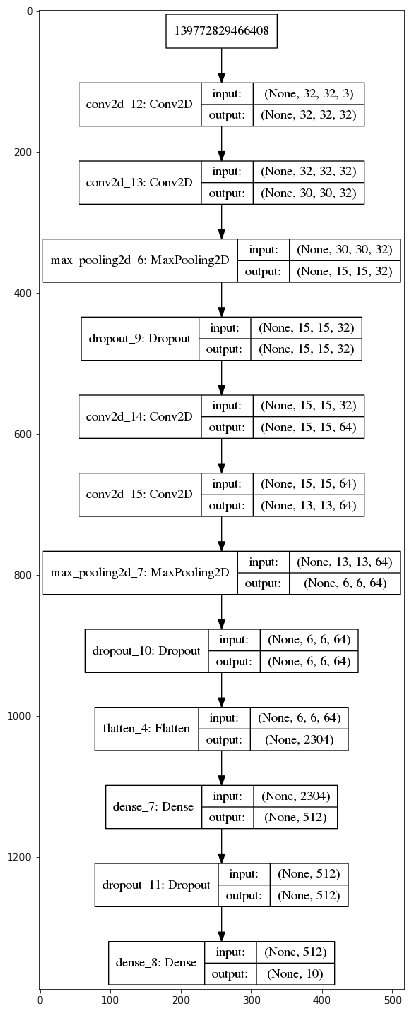

In [110]:
import cv2

img = cv2.imread('mnist.png')
plt.figure(figsize=(30,18))
imgplot = plt.imshow(img)

In [125]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

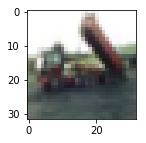

In [127]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[2])